In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import seaborn as sb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
null_count = train_data['VRDeck'].isnull().sum() # Summing up all missing values
total_count = train_data.shape[0] # The amount of rows in our data
print(f'{null_count/total_count * 100:.2f}%')

2.16%


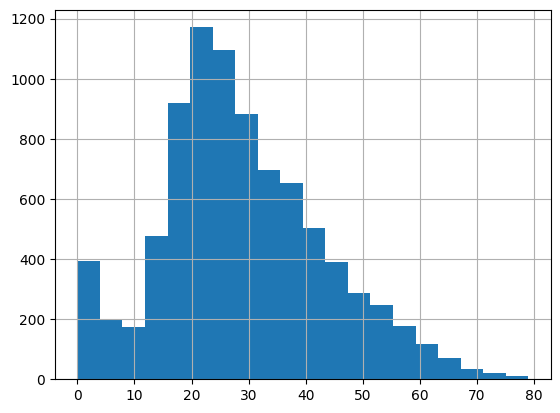

In [5]:
train_data.Age.hist(bins=20)
plt.show();

In [6]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['10 and under', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', 'over 70']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)

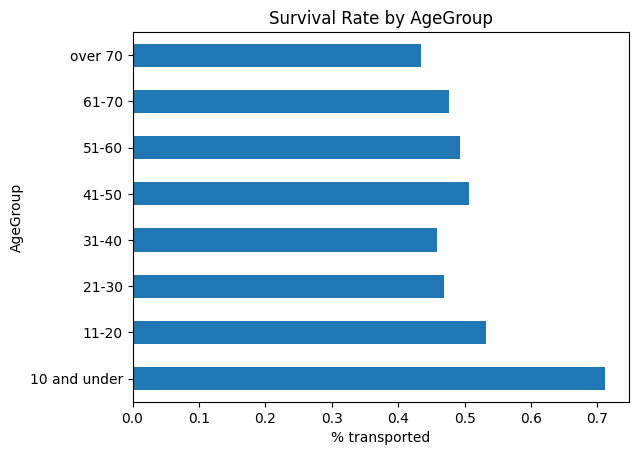

In [7]:
train_data.groupby('AgeGroup').Transported.mean().plot(kind='barh').set_xlabel('% transported');
plt.title('Survival Rate by AgeGroup');

<Axes: xlabel='Transported', ylabel='RoomService'>

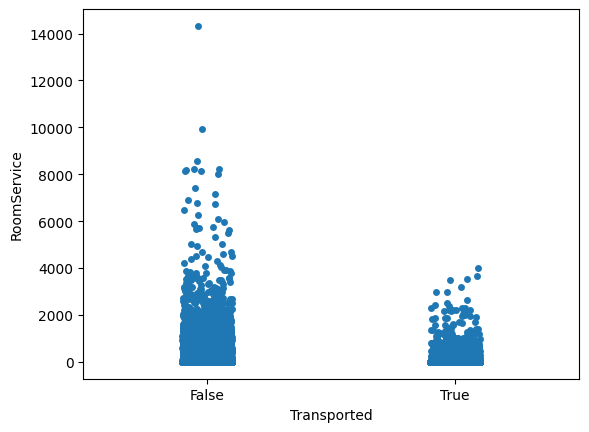

In [8]:
sb.stripplot(data=train_data, x='Transported', y='RoomService')

In [9]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,31-40
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,21-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,51-60
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,31-40
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,41-50
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,11-20
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,21-30
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,31-40


In [10]:
train_data['LastName'] = train_data['Name'].str.split().str[-1]
test_data['LastName'] = test_data['Name'].str.split().str[-1]

In [11]:
train_data['FamilySize'] = train_data.groupby('LastName')['LastName'].transform('count')
test_data['FamilySize'] = test_data.groupby('LastName')['LastName'].transform('count')


In [12]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,LastName,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,31-40,Ofracculy,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,21-30,Vines,4.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,51-60,Susent,6.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,31-40,Susent,6.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,11-20,Santantines,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,41-50,Noxnuther,3.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,11-20,Mondalley,2.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,21-30,Connon,6.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,31-40,Hontichre,6.0


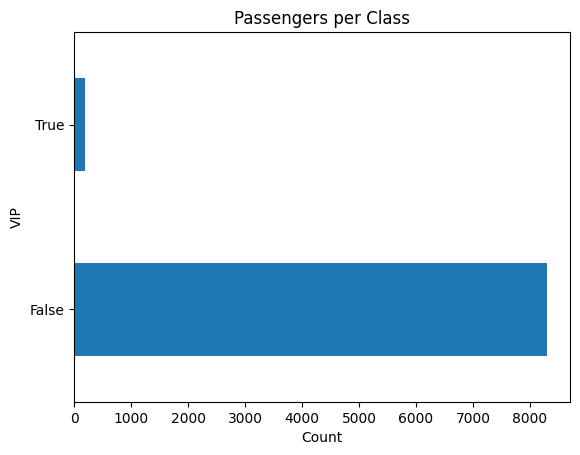

In [13]:
train_data['VIP'].value_counts().plot(kind='barh');
plt.xlabel("Count");
plt.title("Passengers per Class");

In [14]:
under_15 = train_data[train_data['Age'] < 15]
over_15 = train_data[train_data['Age'] >= 15]
percentage_under_15 = (under_15['Transported'].sum() / len(under_15)) * 100
percentage_over_15 = (over_15['Transported'].sum() / len(over_15)) * 100

print(f"Percentage of passengers transported under 40: {percentage_under_15:.2f}%")
print(f"Percentage of passengers transported 40 and older: {percentage_over_15:.2f}%")

Percentage of passengers transported under 40: 65.71%
Percentage of passengers transported 40 and older: 48.12%


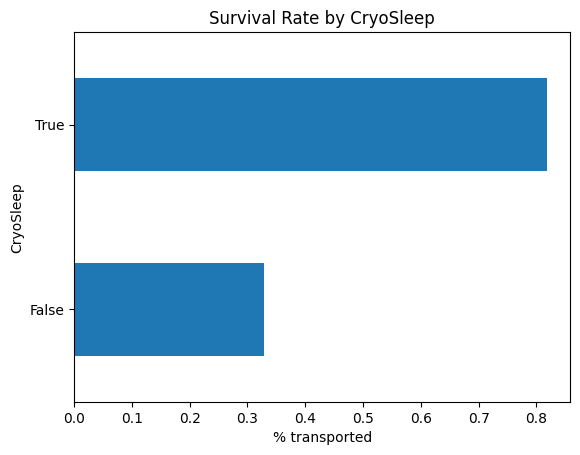

In [15]:
train_data.groupby('CryoSleep').Transported.mean().plot(kind='barh').set_xlabel('% transported');
plt.title('Survival Rate by CryoSleep');

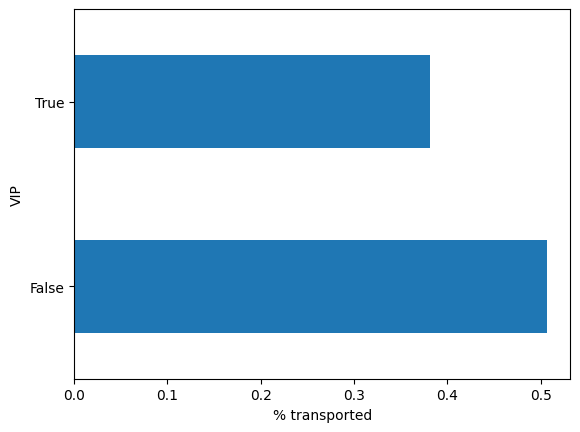

In [16]:
train_data.groupby('VIP').Transported.mean().plot(kind='barh').set_xlabel('% transported');

In [17]:
train_data['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

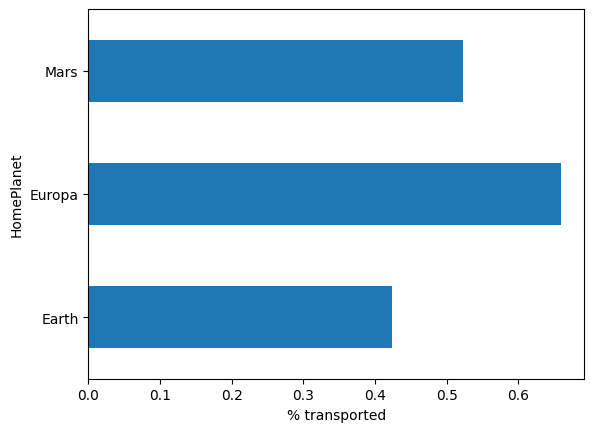

In [18]:
train_data.groupby('HomePlanet').Transported.mean().plot(kind='barh').set_xlabel('% transported');

In [19]:
train_data['TotalSpending'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
test_data['TotalSpending'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']

In [20]:
# train_data['RoomService'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
train_data.loc[train_data['TotalSpending'] == 0, 'CryoSleep'] = True
train_data.loc[train_data['TotalSpending'] > 0, 'CryoSleep'] = False
train_data['CryoSleep'].isna().sum()

test_data.loc[test_data['TotalSpending'] == 0, 'CryoSleep'] = True
test_data.loc[test_data['TotalSpending'] > 0, 'CryoSleep'] = False
test_data['CryoSleep'].isna().sum()


6

In [21]:
train_data['TotalSpending'].isna().sum()

908

In [22]:
# Fill NaN and 0 values in "RoomService" column with mean value
non_zero_values = train_data['TotalSpending'][train_data['TotalSpending'] != 0]
mean_value = non_zero_values.mean()
train_data['TotalSpending'].replace({0: None}, inplace=True)
train_data['TotalSpending'].fillna(mean_value, inplace=True)

non_zero_values = test_data['TotalSpending'][test_data['TotalSpending'] != 0]
mean_value = non_zero_values.mean()
test_data['TotalSpending'].replace({0: None}, inplace=True)
test_data['TotalSpending'].fillna(mean_value, inplace=True)

In [23]:
train_data[['Cabin_1', 'Cabin_2', 'Cabin_3']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Cabin_1', 'Cabin_2', 'Cabin_3']] = test_data['Cabin'].str.split('/', expand=True)

In [24]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,AgeGroup,LastName,FamilySize,TotalSpending,Cabin_1,Cabin_2,Cabin_3
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,31-40,Ofracculy,1.0,2546.8539,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,21-30,Vines,4.0,736.0000,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,51-60,Susent,6.0,10383.0000,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,31-40,Susent,6.0,5176.0000,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,11-20,Santantines,6.0,1091.0000,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,41-50,Noxnuther,3.0,8536.0000,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,11-20,Mondalley,2.0,2546.8539,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,21-30,Connon,6.0,1873.0000,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,31-40,Hontichre,6.0,4637.0000,E,608,S


In [25]:
median_value = train_data['Cabin_2'].dropna().astype(int).median()
# Replace NaN values in Cabin_2 with the calculated median
train_data['Cabin_2'].fillna(median_value, inplace=True)

median_value = test_data['Cabin_2'].dropna().astype(int).median()
# Replace NaN values in Cabin_2 with the calculated median
test_data['Cabin_2'].fillna(median_value, inplace=True)

In [26]:
train_data['Cabin_2'] = train_data['Cabin_2'].astype(int)
test_data['Cabin_2'] = test_data['Cabin_2'].astype(int)

In [27]:
bins = [0, 190, 380, 570, 760, 950, 1140, 1330, 1520, 1710, float('inf')]
labels = ['0-190', '191-380', '381-570', '571-760', '761-950', '951-1140', '1141-1330', '1331-1520', '1521-1710', '1711-1900']
train_data['Cabin_2_Group'] = pd.cut(train_data['Cabin_2'], bins=bins, labels=labels, right=False)
test_data['Cabin_2_Group'] = pd.cut(test_data['Cabin_2'], bins=bins, labels=labels, right=False)

In [28]:
train_data['CryoSleep'].isna().sum()

24

In [29]:
train_data['TotalSpending'].isna().sum()

0

In [30]:
train_data['CryoSleep'].fillna(True, inplace=True)
test_data['CryoSleep'].fillna(True, inplace=True)

In [31]:
train_data['CryoSleep'].isna().sum()

0

In [32]:
train_data['Transported'] = train_data['Transported'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

In [33]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,AgeGroup,LastName,FamilySize,TotalSpending,Cabin_1,Cabin_2,Cabin_3,Cabin_2_Group
0,0001_01,Europa,1,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,0,31-40,Ofracculy,1.0,2546.8539,B,0,P,0-190
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,1,21-30,Vines,4.0,736.0000,F,0,S,0-190
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,0,51-60,Susent,6.0,10383.0000,A,0,S,0-190
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,0,31-40,Susent,6.0,5176.0000,A,0,S,0-190
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,1,11-20,Santantines,6.0,1091.0000,F,1,S,0-190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,Gravior Noxnuther,0,41-50,Noxnuther,3.0,8536.0000,A,98,P,0-190
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,Kurta Mondalley,0,11-20,Mondalley,2.0,2546.8539,G,1499,S,1331-1520
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,Fayey Connon,1,21-30,Connon,6.0,1873.0000,G,1500,S,1331-1520
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,Celeon Hontichre,0,31-40,Hontichre,6.0,4637.0000,E,608,S,571-760


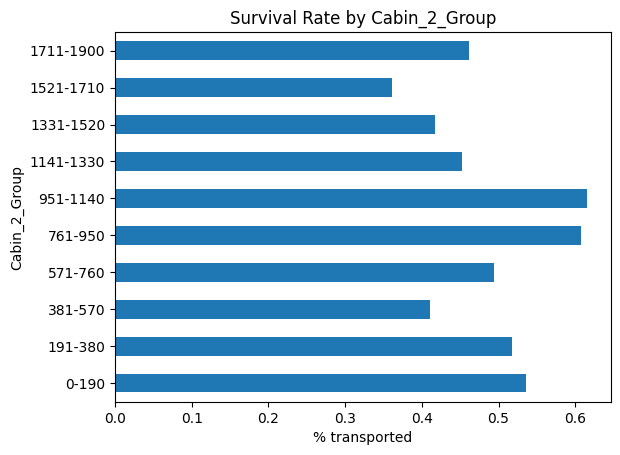

In [34]:
train_data.groupby('Cabin_2_Group').Transported.mean().plot(kind='barh').set_xlabel('% transported');
plt.title('Survival Rate by Cabin_2_Group');

In [35]:
train_data['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

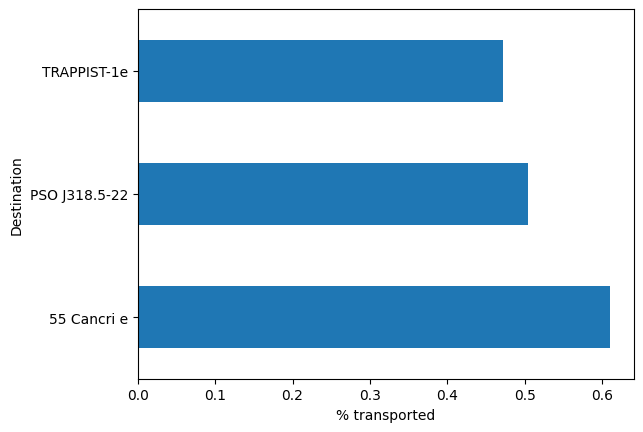

In [36]:
train_data.groupby('Destination').Transported.mean().plot(kind='barh').set_xlabel('% transported');

In [37]:
train_data['Transported'] = train_data['Transported'].astype(int)

In [38]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Define the target variable (what we want to predict)
# We are predicting the "Survived" column from the training data
y = train_data["Transported"]

# Define the feature columns that will be used for prediction
features = ["HomePlanet", "CryoSleep", "Destination","Cabin_1", "Cabin_3", "Cabin_2_Group", "AgeGroup", "FamilySize"]

# Use one-hot encoding to convert categorical columns into numerical form
# This is important because most machine learning algorithms require numerical input
X = pd.get_dummies(train_data[features])  # Training features
X_test = pd.get_dummies(test_data[features])  # Test features

# Split the dataset into training and validation sets
# The training set will be used to train the model
# The validation set will be used to evaluate the model's performance
# Setting random_state to a constant ensures reproducibility of the split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [39]:
# Import the SimpleImputer from scikit-learn
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer object
# This object will be used to fill missing values in the dataset
my_imputer = SimpleImputer()

# Fill missing values in the training features and create a new DataFrame
final_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))

# Fill missing values in the validation features using the imputer fitted on the training data
# and create a new DataFrame
final_X_valid = pd.DataFrame(my_imputer.transform(val_X))

In [40]:
final_X_test = pd.DataFrame(my_imputer.fit_transform(X_test))
final_X_test

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4273,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4274,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
final_X_train

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6515,0.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6516,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6517,1.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(10, activation='relu', input_shape=(len(final_X_train.columns),)),
#     Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
#     Dense(256, activation='relu'),
#     Dense(64, activation='relu'),
#     Dropout(0.3),  # Dropout layer with a dropout rate of 0.3
    Dense(1, activation='sigmoid')
])

2024-04-09 16:52:20.868602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 16:52:20.868697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 16:52:21.009902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the final Random Forest model using the training data
history = model.fit(final_X_train, train_y, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
108/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5311 - loss: 0.7767

I0000 00:00:1712681553.510688      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5415 - loss: 0.7525 - val_accuracy: 0.6465 - val_loss: 0.6247
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 0.6233 - val_accuracy: 0.6910 - val_loss: 0.5706
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5850 - val_accuracy: 0.7354 - val_loss: 0.5325
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7367 - loss: 0.5414 - val_accuracy: 0.7515 - val_loss: 0.5134
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7318 - loss: 0.5272 - val_accuracy: 0.7515 - val_loss: 0.5067
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7364 - loss: 0.5266 - val_accuracy: 0.7623 - val_loss: 0.4996
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.5120 - val_accuracy: 0.7638 - val_loss: 0.4945
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7412 - loss: 0.5181 - val_accuracy: 0.7653

In [44]:
# Make predictions on the test data using the trained model
predictions = model.predict(final_X_test)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
predictions = np.round(predictions)

In [46]:
# Assuming predictions_1d is your 1-dimensional predictions array
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': list(predictions)})
output['Transported'] = output['Transported'].astype(bool)
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [47]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
